# Sparse SPoSE Reconstruction Analysis - Results Visualization

This notebook creates comprehensive visualizations for the multi-seed comparison between ADMM and SPoSE models.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Load all data files
DIMS = 49


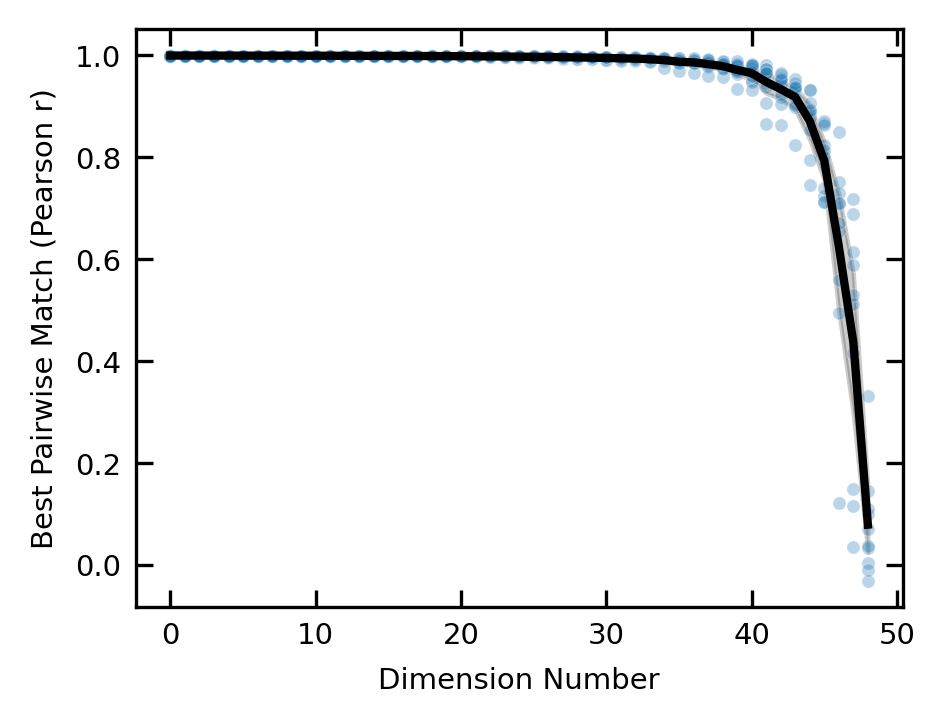

In [45]:
pairwise = pd.read_csv(f"../experiments/things_behavior/outputs/{DIMS}/pairwise_reconstruction.csv")

fig, ax = plt.subplots(figsize=(3.3, 2.5), dpi=300)
sns.lineplot(data=pairwise, x="dimension", y="correlation", color="black", linewidth=2)
sns.scatterplot(data=pairwise, x="dimension", y="correlation", alpha=0.3, s=10)

ax.set_xlabel("Dimension Number", fontsize=7)
ax.set_ylabel("Best Pairwise Match (Pearson r)", fontsize=7)

ax.tick_params(
    direction="in",
    top=True,
    right=True,
    which="both",
    labelsize=7,
    length=4,
)
fig.savefig(
    f"../experiments/things_behavior/outputs/{DIMS}/pairwise_reconstruction.pdf",
    dpi=300,
    bbox_inches="tight",
)


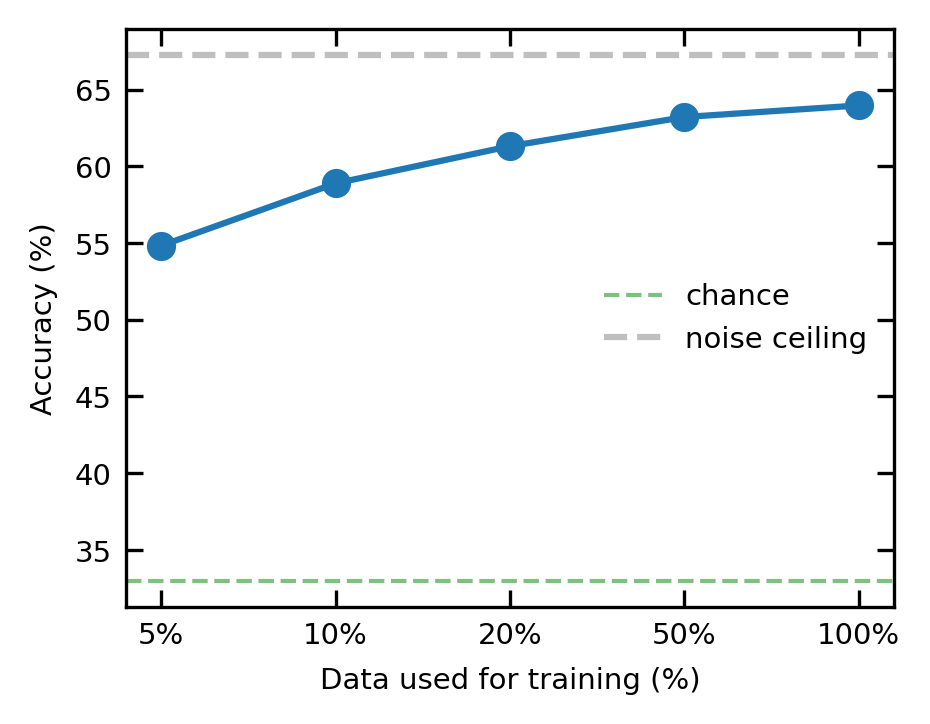

In [35]:
low_data_df = pd.read_csv(f"../experiments/things_behavior/outputs/{DIMS}/low_data.csv")
fig, ax = plt.subplots(figsize=(3.3, 2.5), dpi=300)

# Group by Data_Percentage and calculate mean and std
grouped = (
    low_data_df.groupby("data_percentage")["accuracy"]
    .agg(["mean", "std"])
    .reset_index()
)

# Convert accuracy to percentage
grouped["mean"] = grouped["mean"] * 100
grouped["std"] = grouped["std"] * 100

# Create evenly spaced x positions
x_positions = np.linspace(0, 1, len(grouped))

# Plot mean line with error bars
ax.errorbar(
    x_positions,
    grouped["mean"],
    yerr=grouped["std"],
    marker="o",
)

ax.set_ylabel("Accuracy (%)", fontsize=7)
ax.set_xlabel("Data used for training (%)", fontsize=7)
ax.axhline(y=33, color="green", linestyle="--", alpha=0.5, label="chance", linewidth=1)
ax.axhline(y=67.22, color="gray", linestyle="--", alpha=0.5, label="noise ceiling")

# Set x-axis ticks and labels
ax.set_xticks(x_positions)
ax.set_xticklabels([f"{p*100:.0f}%" for p in grouped["data_percentage"]])

ax.tick_params(
    direction="in",
    top=True,
    right=True,
    which="both",
    labelsize=7,
    length=4,
)

ax.legend(frameon=False, fontsize=7)

plt.show()
fig.savefig(
    f"../experiments/things_behavior/outputs/{DIMS}/low_data_accuracy.pdf", dpi=300, bbox_inches="tight"
)


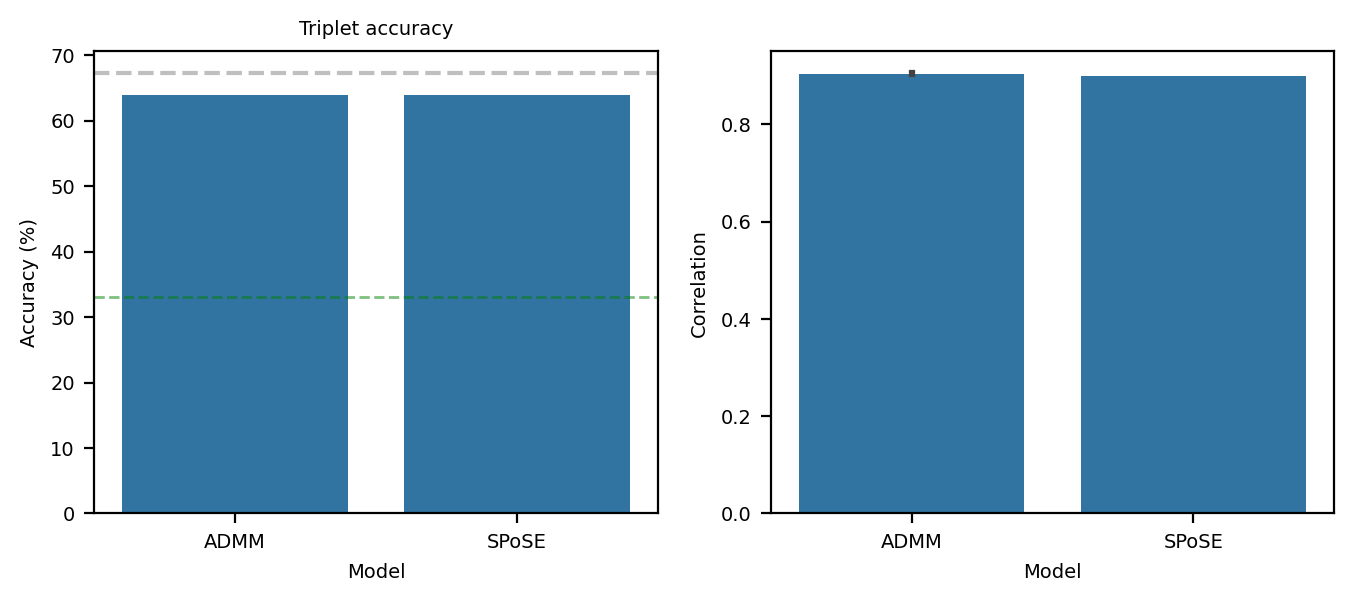

In [ ]:
df = pd.read_csv(f"../experiments/things_behavior/outputs/{DIMS}/accuracy_comparison.csv")
# multiply accuracy by 100
df["accuracy"] = df["accuracy"] * 100
fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=200)
sns.barplot(data=df, x="model", y="accuracy", ax=ax[0])
ax[0].set_ylabel("Accuracy (%)", fontsize=7)
ax[0].set_xlabel("Model", fontsize=7)
ax[0].tick_params(labelsize=7)
ax[0].set_title("Triplet accuracy", fontsize=7)
ax[0].axhline(
    y=33, color="green", linestyle="--", alpha=0.5, label="chance", linewidth=1
)
ax[0].axhline(y=67.22, color="gray", linestyle="--", alpha=0.5, label="noise ceiling")

sns.barplot(data=df, x="model", y="correlation", ax=ax[1])
ax[1].set_ylabel("Correlation", fontsize=7)
ax[1].set_xlabel("Model", fontsize=7)
ax[1].tick_params(labelsize=7)


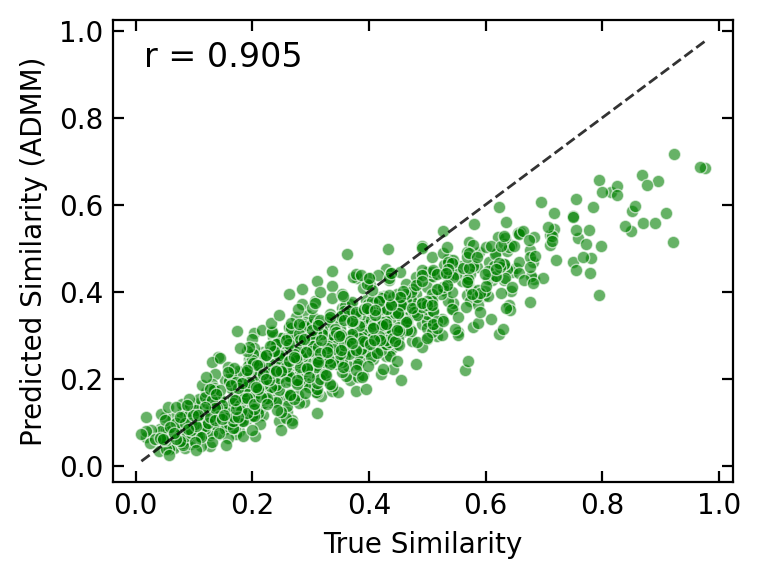

In [33]:
similarity_df = pd.read_csv(f"../experiments/things_behavior/outputs/{DIMS}/48_performance.csv")

# Filter data for ADMM model only and seed 0
admm_data = similarity_df[
    (similarity_df["model"] == "ADMM") & (similarity_df["seed"] == 2)
]

# Create scatter plot
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)

# Scatter plot with true similarity on x-axis and predicted similarity on y-axis
scatter = ax.scatter(
    admm_data["true_similarity"],
    admm_data["predicted_similarity"],
    alpha=0.6,
    color="green",  # Changed to green
    s=20,
    edgecolors="white",
    linewidth=0.5,
)

# Add perfect correlation line
min_val = min(
    admm_data["true_similarity"].min(), admm_data["predicted_similarity"].min()
)
max_val = max(
    admm_data["true_similarity"].max(), admm_data["predicted_similarity"].max()
)
ax.plot(
    [min_val, max_val],
    [min_val, max_val],
    "k--",  # Changed to black dashed line
    alpha=0.8,
    linewidth=1,
)

# Calculate and add correlation coefficient
correlation = np.corrcoef(
    admm_data["true_similarity"], admm_data["predicted_similarity"]
)[0, 1]
ax.text(
    0.05,
    0.9,
    f"r = {correlation:.3f}",
    transform=ax.transAxes,
    fontsize=12,
)

# Customize plot
ax.set_xlabel("True Similarity", fontsize=10)
ax.set_ylabel("Predicted Similarity (ADMM)", fontsize=10)

ax.tick_params(
    direction="in",
    top=True,
    right=True,
    which="both",
    labelsize=10,
    length=4,
)

plt.show()

fig.savefig("../experiments/things_behavior/outputs/48_predicted.pdf", dpi=300, bbox_inches="tight")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


spose_dimension_df = pd.read_csv("../experiments/things_behavior/outputs/spose_cross_validation.csv")


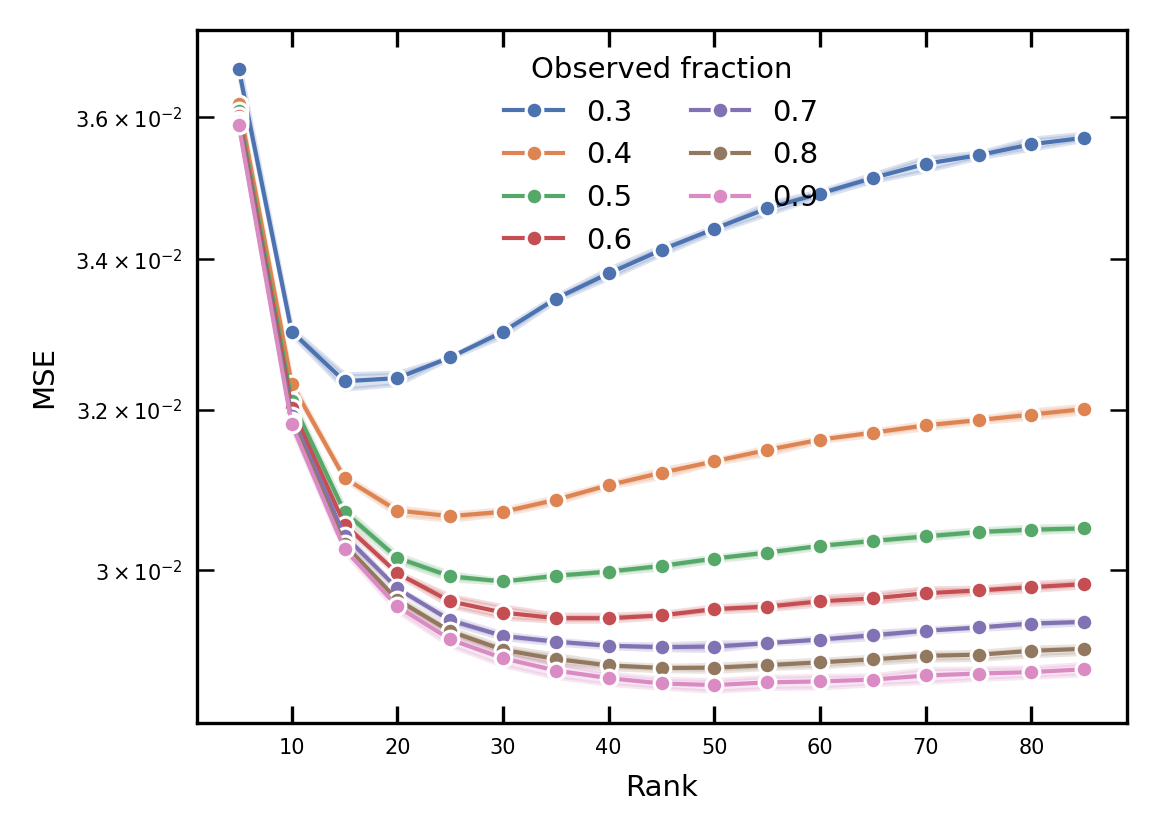

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


things_cval_df = pd.read_csv("../experiments/things_behavior/outputs/spose_cross_validation.csv")
things_cval_df["observed_fraction"] = things_cval_df["observed_fraction"].round(2)


fig, ax = plt.subplots(figsize=(4, 3), dpi=300)

# Use distinct colors for each fraction
n_fractions = len(things_cval_df["observed_fraction"].unique())

sns.lineplot(
    data=things_cval_df,
    x="rank",
    y="score",
    hue="observed_fraction",
    palette="deep",
    linewidth=1.0,
    marker="o",
    markersize=4,
    alpha=1.0,
    ax=ax,
)
ax.set_yscale("log")
ax.tick_params(axis="y", which="both", labelsize=5)
ax.tick_params(axis="x", which="both", labelsize=5)
ax.set_xlabel("Rank", fontsize=7)
ax.set_ylabel("MSE", fontsize=7)
ax.tick_params(direction="in", top=True, right=True, which="both", length=4)
ax.legend(
    title="Observed fraction", fontsize=7, title_fontsize=7, ncol=2, frameon=False
)

plt.show()


/tmp/ipykernel_11974/3835014570.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  optimal_ranks = things_cval_df.groupby("observed_fraction").apply(
/tmp/ipykernel_11974/3835014570.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


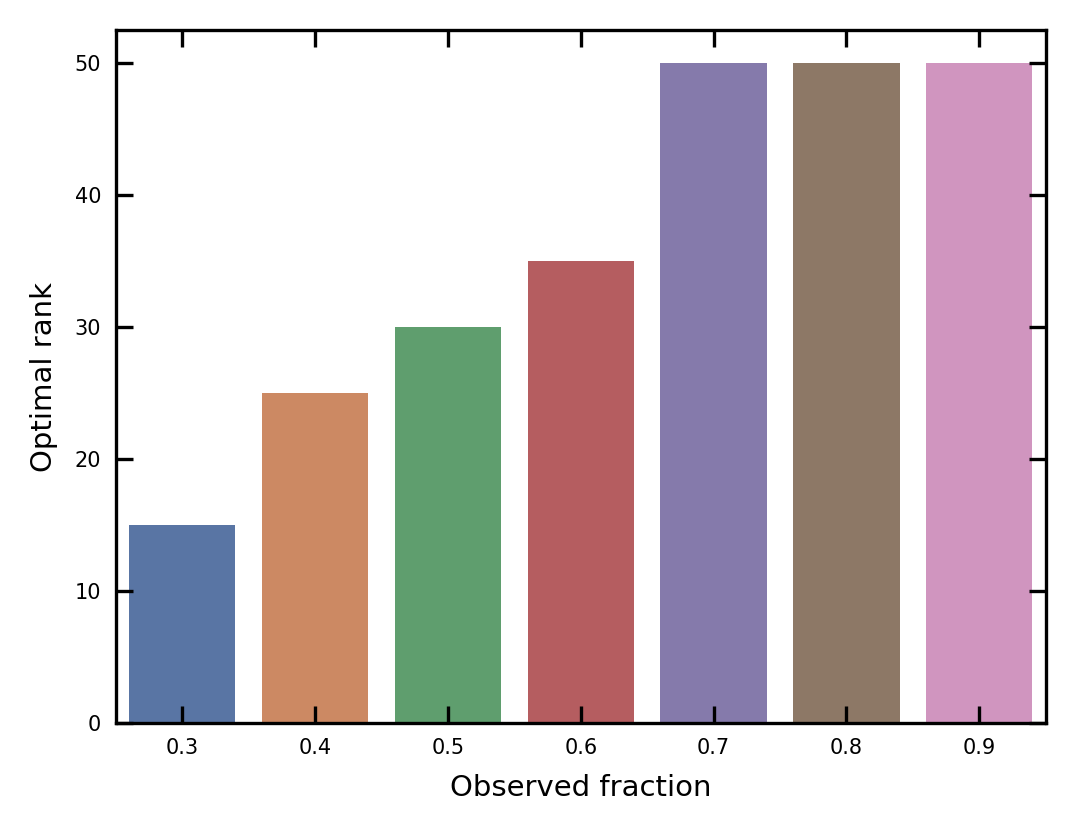

In [ ]:
# Make a barplot of the optimal rank for each observed fraction

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


things_cval_df = pd.read_csv("../experiments/things_behavior/outputs/spose_cross_validation.csv")
things_cval_df["observed_fraction"] = things_cval_df["observed_fraction"].round(2)

# Find the optimal rank for each observed fraction
optimal_ranks = (
    things_cval_df.groupby("observed_fraction")
    .apply(lambda x: x.loc[x["score"].idxmin(), "rank"])
    .reset_index()
)
optimal_ranks.columns = ["observed_fraction", "optimal_rank"]

fig, ax = plt.subplots(figsize=(4, 3), dpi=300)

sns.barplot(
    data=optimal_ranks,
    x="observed_fraction",
    y="optimal_rank",
    palette="deep",
    ax=ax,
)

ax.set_xlabel("Observed fraction", fontsize=7)
ax.set_ylabel("Optimal rank", fontsize=7)
ax.tick_params(axis="both", which="major", labelsize=5)
ax.tick_params(direction="in", top=True, right=True, which="both", length=4)

plt.show()


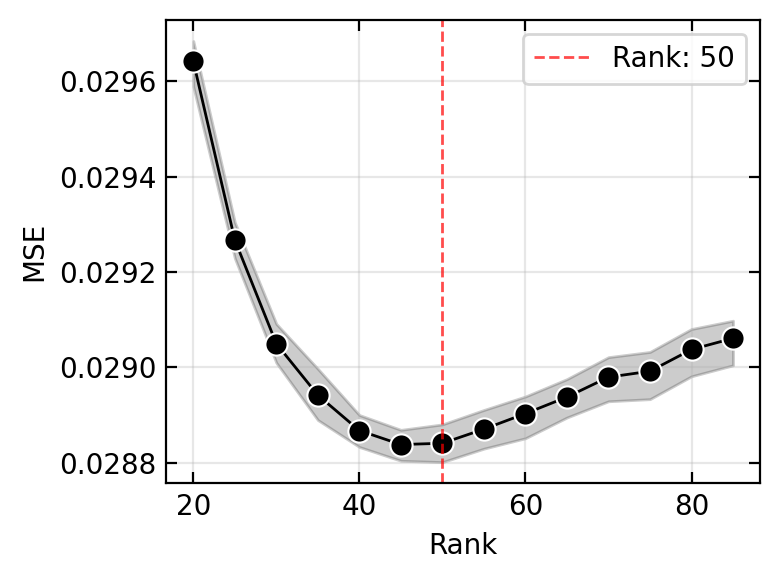

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


spose_dimension_df = pd.read_csv("../experiments/things_behavior/outputs/spose_cross_validation.csv")

# kick everything below 20
spose_dimension_df = spose_dimension_df[spose_dimension_df["rank"] >= 20]


fig, ax = plt.subplots(figsize=(4, 3), dpi=200)

sns.lineplot(
    data=spose_dimension_df,
    x="rank",
    y="score",
    color="black",
    marker="o",
    linewidth=1,
    markersize=8,
    ax=ax,
)

best_rank = spose_dimension_df.loc[spose_dimension_df["score"].idxmin(), "rank"]
best_score = spose_dimension_df["score"].min()

ax.axvline(
    x=best_rank,
    color="red",
    linestyle="--",
    alpha=0.7,
    linewidth=1,
    label=f"Rank: {best_rank}",
)

ax.set_xlabel("Rank")
ax.set_ylabel("Mean test score")
ax.tick_params(axis="both", which="major", labelsize=12)
ax.tick_params(
    direction="in",
    top=True,
    right=True,
    which="both",
    labelsize=10,
    length=4,
)
ax.set_xlabel("Rank")
ax.set_ylabel("MSE")
ax.grid(True, alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()
